**E2B code interpreter use sandbox environment to run code**

In [ ]:
! pip install -q "groq==0.11.0" "e2b_code_interpreter==1.0.1" "python-dotenv==1.0.1"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.6/81.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.4 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
import os
from dotenv import load_dotenv

Groq_api_key = userdata.get('GROQ_API_KEY')
E2B_api_key  = userdata.get('E2B_API_KEY')

In [ ]:
MODEL_NAME = "llama3-8b-8192"
# MODEL_NAME = "llama3-70b-8192"

SYSTEM_PROMPT = """You're a python data scientist. You are given tasks to complete and you run python code to solve them.
- do not respond with anything else but python code.
- do not forget any imports like `import numpy as np`
- the python code runs in jupyter notebook.
- every time you generate code, it's executed in a separate cell in jupyter notebook.
- display visualizations using matplotlib or any other visualization library directly in the jupyter notebook. don't worry about saving the visualizations to a file.
- you have access to the internet and can make api requests.
- you also have access to the filesystem and can read/write files.
- you can install any pip package (if it exists) if you need to but the usual packages for data analysis are already preinstalled.
- you can run any python code you want, everything is running in a secure sandbox environment
"""



In [ ]:
def code_interpret(e2b_code_interpreter, code):
  print("Running code interpreter...")

  exec = e2b_code_interpreter.run_code(code,
  on_stderr=lambda stderr: print("[Code Interpreter]", stderr),
  on_stdout=lambda stdout: print("[Code Interpreter]", stdout))

  if exec.error:
    print("[Code Interpreter ERROR]", exec.error)
  else:
    return exec.results

In [ ]:
import json
import re
from groq import Groq

client = Groq(api_key=Groq_api_key)

# compiles a regular expression pattern to match Markdown code blocks
def match_code_blocks(text):
  pattern = re.compile(r'```(?:python)?[\n\r](.*?)```', re.DOTALL)
  return pattern.findall(text)

def chat_with_llama(e2b_code_interpreter, user_message):
  print(f"\n{'='*50}\nUser message: {user_message}\n{'='*50}")

  messages = [
      {"role": "system", "content": SYSTEM_PROMPT},
      {"role": "user", "content": user_message}
  ]

  response = client.chat.completions.create(
      model=MODEL_NAME,
      messages=messages,
  )

  content = response.choices[0].message.content
  print(f"\nLlama3 response:\n{content}")
  print("===")

  code_results = []
  code_blocks = match_code_blocks(content)
  for code in code_blocks:
    print(f"code to run: {code}")

    code_interpreter_results = code_interpret(e2b_code_interpreter, code)
    print(f"Total Results: {code_interpreter_results}")
    code_results.append(code_interpreter_results)

  return code_results

use Sandbox environment to calculate π using the Monte Carlo method, gathers visual results, and retrieves and prints them from the AI code interaction.


User message: Calculate value of pi using monte carlo method. Use 1000 iterations. Visualize all points of all iterations on a single plot, a point inside the unit circle should be green, other points should be gray.

Llama3 response:
```python
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_pi(iterations):
    inside_circle = 0
    x_values = np.random.uniform(0, 1, size=iterations)
    y_values = np.random.uniform(0, 1, size=iterations)

    for i in range(iterations):
        if x_values[i]**2 + y_values[i]**2 <= 1:
            inside_circle += 1

    pi_estimate = 4 * inside_circle / iterations
    print("Estimated value of pi:", pi_estimate)
    
    fig, ax = plt.subplots()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title('Monte Carlo Pi Estimation')

    for i in range(iterations):
        if x_values[i]**2 + y_values[i]**2 <= 1:
            ax.scatter(x_values[i], y_values[i], color='green', alpha=0.5)
        else:
            ax.scatter(x_valu

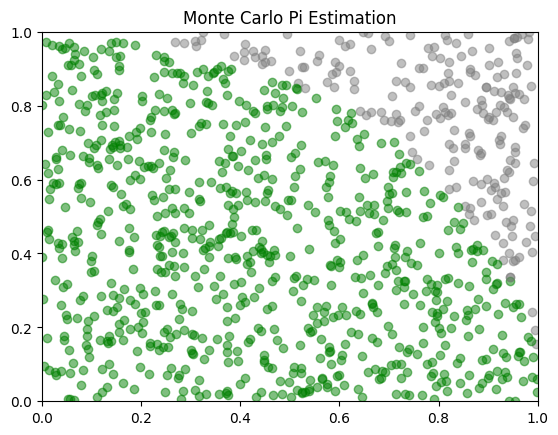

In [ ]:
from e2b_code_interpreter import Sandbox

# initializes a sandboxed environment for running code with Sandbox
with Sandbox(api_key=E2B_api_key) as code_interpreter:
  all_code_blocks_results = chat_with_llama(
    code_interpreter,
    "Calculate value of pi using monte carlo method. Use 1000 iterations. Visualize all points of all iterations on a single plot, a point inside the unit circle should be green, other points should be gray.",
  )
  for result in all_code_blocks_results:
    print(result[0])

# Each code block can have multiple code interpreter results
first_result = all_code_blocks_results[0][0]

# This will render the image
first_result

Use Sandbox environment to estimate the value of e using the Monte Carlo method


User message: Write a Python code to estimate the value of e using the Monte Carlo method. Use 1000 iterations. Visualize all points of all iterations on a single plot, a point above the line y = x should be green, other points should be gray. Note: The value of e is approximately equal to the probability that a random point in the first quadrant (x > 0, y > 0) is above the line y = x.

Llama3 response:
```
import numpy as np
import matplotlib.pyplot as plt

# Set the number of iterations
n_iterations = 1000

# Initialize the array to store the points
points = np.zeros((n_iterations, 2))

# Generate random points
for i in range(n_iterations):
    points[i, 0] = np.random.uniform(0, 1)
    points[i, 1] = np.random.uniform(0, 1)

# Initialize the counters for points above and below the line
above = 0
below = 0

# Count the points above and below the line
for point in points:
    if point[0] > point[1]:
        above += 1
    else:
        below += 1

# Estimate the value of e
estimated_

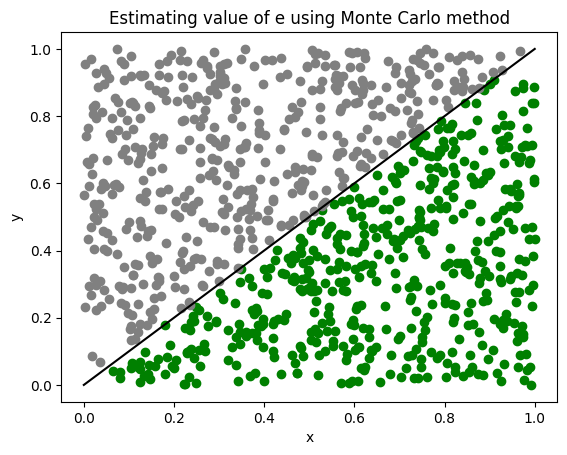

In [ ]:
from e2b_code_interpreter import Sandbox

# initializes a sandboxed environment for running code with Sandbox
with Sandbox(api_key=E2B_api_key) as code_interpreter:
  all_code_blocks_results = chat_with_llama(
    code_interpreter,
    "Write a Python code to estimate the value of e using the Monte Carlo method. Use 1000 iterations. Visualize all points of all iterations on a single plot, a point above the line y = x should be green, other points should be gray. Note: The value of e is approximately equal to the probability that a random point in the first quadrant (x > 0, y > 0) is above the line y = x.",
  )
  for result in all_code_blocks_results:
    print(result[0])

# Each code block can have multiple code interpreter results
first_result = all_code_blocks_results[0][0]

# This will render the image
first_result